In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
df = pd.read_csv('../data/Car_sales.csv');
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [188]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357



## Problèmatique : Prédiction du prix de vente de voitures

#### Tout d'abord on analyse de la répartition des prix par rapports aux constructeurs

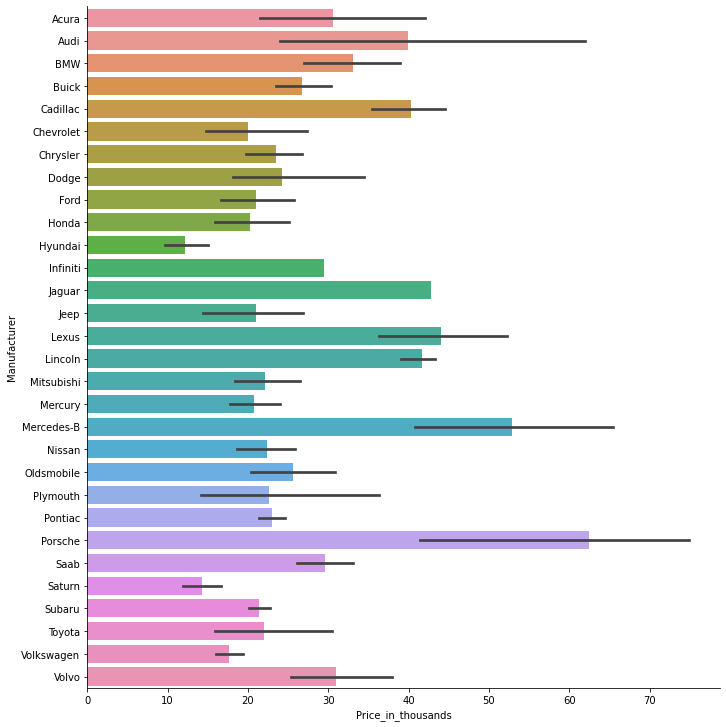

In [189]:
sns.catplot(x="Price_in_thousands", y="Manufacturer", data= df, kind="bar", height=10)

On constaste que les prix sont répartire de facons inégales entres les constructeurs

In [190]:
#### Ensuite on va analyser qu'elles sont les valeurs qui influence le prix de ventes d'une voiture

<AxesSubplot:>

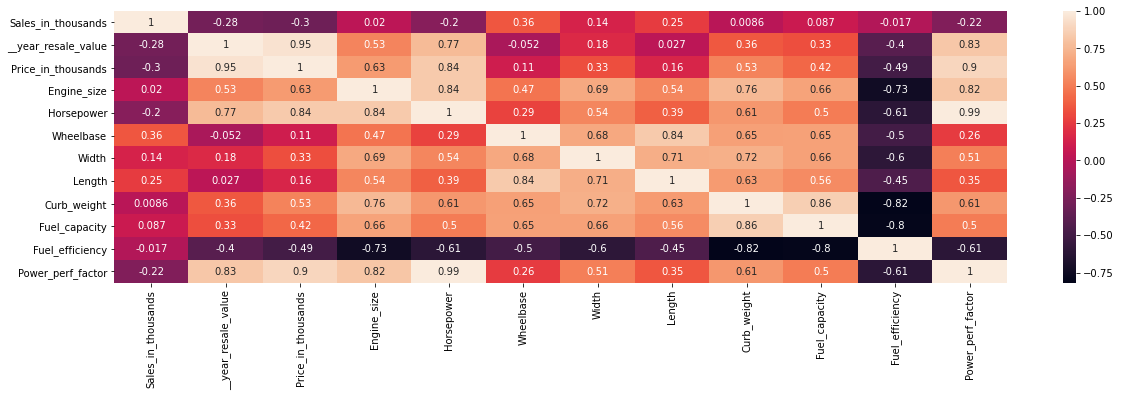

In [191]:
corr = df.corr()
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(corr, annot=True, ax =ax)

On constate que le prix de vente d'une voiture (Price_in-thousands) est principalement influencer par la valeur de revente à l'année (_year_resale_value) et la puissance du moteur (Power_perf_factor)

#### Model building

In [192]:
df.head(),df.shape

(  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
 0        Acura  Integra              16.919               16.360    Passenger   
 1        Acura       TL              39.384               19.875    Passenger   
 2        Acura       CL              14.114               18.225    Passenger   
 3        Acura       RL               8.588               29.725    Passenger   
 4         Audi       A4              20.397               22.255    Passenger   
 
    Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
 0               21.50          1.8       140.0      101.2   67.3   172.4   
 1               28.40          3.2       225.0      108.1   70.3   192.9   
 2                 NaN          3.2       225.0      106.9   70.6   192.0   
 3               42.00          3.5       210.0      114.6   71.4   196.6   
 4               23.99          1.8       150.0      102.6   68.2   178.0   
 
    Curb_weight  Fuel_capacity  Fuel_effic

In [193]:
df = df.dropna()

In [194]:
x=df.loc[:,('__year_resale_value','Power_perf_factor')].values
y=df['Price_in_thousands']

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.5)

In [196]:
from sklearn.linear_model import LinearRegression
linearReg=LinearRegression().fit(X_train,Y_train)
Y_pred=linearReg.predict(X_test)

print(Y_pred)

[22.70176927 26.70264534 22.61325832 18.06077717 13.55296729 25.34376988
 14.69242639 18.40223893 44.82623876 21.62692407 33.90640295 16.79298268
 21.51065115 12.78745992 15.19486163 11.72229254 17.92062778 17.10012338
 24.94213277 36.03944252 50.19258857 29.53721755 19.55558704 30.01496361
 20.91293147 15.67380091 13.16528467 33.80026308 27.62680619 13.80398158
 14.1809059  38.66462325 18.73244731 22.20739804 13.74328137 36.85856728
 25.29361529 22.97737888 80.68960108 41.8818171  21.00475295 18.32743068
 32.12291926 18.56623896 34.70720655 13.16528467 21.30384166 22.21982757
 15.84721777 15.31926071 20.27925875 17.63285105  9.21111249 19.51759172
 23.54958032 27.47898999 22.96589746 17.66140199 19.42740533]


In [197]:
from sklearn.metrics import r2_score
acc = r2_score(Y_test,Y_pred)
print('Accuracy: ', acc)

Accuracy:  0.9329026930536168
